In [20]:
import tensorflow as tf
from tensorflow import keras

In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [31]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))


In [32]:
model.add(keras.layers.MaxPooling2D(2,2))


In [34]:
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))


In [35]:
model.add(keras.layers.MaxPooling2D(2,2))


In [38]:
model.add(keras.layers.Flatten())


In [40]:
model.add(keras.layers.Dense(128,activation=tf.nn.relu))


In [43]:
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))


In [49]:
train_images_scaled=train_images/255
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(train_images_scaled.reshape(-1,28,28,1),train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 36s 597us/sample - loss: 0.4506 - accuracy: 0.8361
Epoch 2/5
60000/60000 [==============================] - 37s 609us/sample - loss: 0.2998 - accuracy: 0.8895
Epoch 3/5
60000/60000 [==============================] - 36s 607us/sample - loss: 0.2550 - accuracy: 0.9064
Epoch 4/5
60000/60000 [==============================] - 36s 596us/sample - loss: 0.2204 - accuracy: 0.9171
Epoch 5/5
60000/60000 [==============================] - 36s 601us/sample - loss: 0.1950 - accuracy: 0.9274


In [50]:
import matplotlib.pyplot as plt

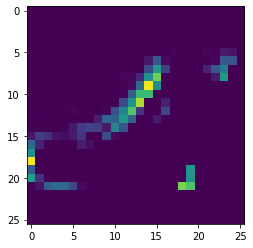

In [54]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input,outputs = layer_outputs)
pred = activation_model.predict(test_images[0].reshape(1,28,28,1))
plt.imshow(pred[0][0,:,:,2])